# HW 2 Monty Hall

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15,8

In [3]:
plt.rcParams['figure.figsize'] = 15,8

# Q1 

Build simulator of the player strategies.  One where the player employs:

1. The stick to your guns strategy -- don't change doors with new information;
2. The other where the player plays with the door switching strategy;

Build your code so that you can simulate up to N rounds (N=100 to start).  Be sure to show your answer in graphical form.

In [4]:
import random 

def pick_door():
    return random.randint(1, 3)


class MontyHall:
    def __init__(self):
        self.prize_door = pick_door()
        self.selected_door = None
        self.removed_door = None

    def select_door(self):
        self.selected_door = pick_door()

    def remove_door(self):
        d = pick_door()
        while d == self.selected_door or d == self.prize_door:
            d = pick_door()
        self.removed_door = d

    def switch_choice(self):
        self.selected_door = 6 - self.selected_door - self.removed_door   # 1 + 2 + 3 = 6

    def user_wins(self):
        if self.selected_door == self.prize_door:
            return True
        else:
            return False

    def run_game(self, switch=True):
        self.select_door()
        self.remove_door()
        if switch:
            self.switch_choice()
        return self.user_wins()


def main(n, switch):
    wins, losses = [0], [0]
    wins_list = []
    losses_list = []
    perc_win_list = []
    
    for i in range(n):
        m = MontyHall()
        # run the game and switch choice of door.
        if switch:
            if m.run_game(switch=True):
                wins[0] += 1
            else:
                losses[0] += 1
        else:
            if m.run_game(switch=False):
                wins[0] += 1
            else:
                losses[0] += 1
        perc_win = 100.0 * wins[0] / (wins[0] + losses[0])
#         print('with %d Monty Hall games (with switching being %s):' % (n, switch))
#         print("won: %s games, lost: %s games, odds: %.2f%% winning percentage. " % (wins[0], losses[0], perc_win))
        wins_list.append(wins[0])
        losses_list.append(losses[0])
        perc_win_list.append(perc_win)
    return wins_list, losses_list, perc_win_list

In [5]:
N = 100
wins_switch = main(N, True)[0]
wins_stick = main(N, False)[0]
perc_switch = main(N, True)[2]
perc_stick = main(N, False)[2]

Text(0.5, 1.0, 'Accumulative Wins Count with 100 - 100 Rounds of Guesses')

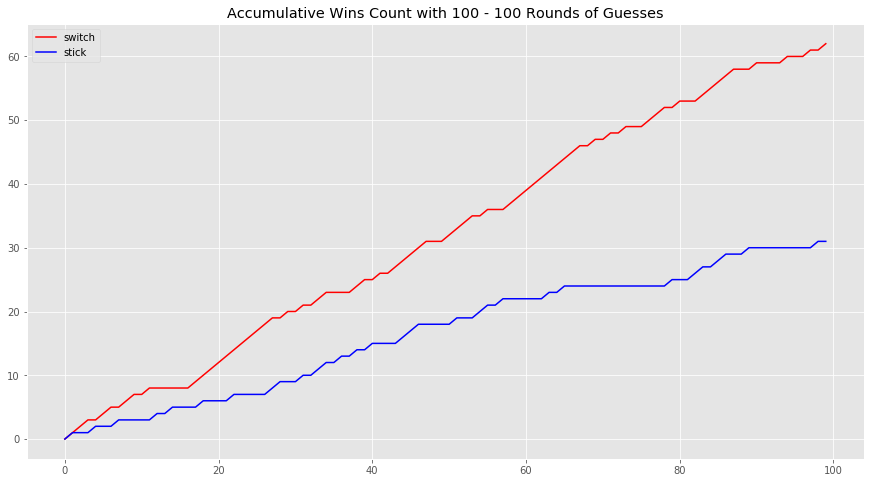

In [6]:
plt.plot(wins_switch, color='r', label='switch')
plt.plot(wins_stick, color='b', label='stick')
plt.legend()
plt.plot()
plt.title('Accumulative Wins Count with 100 - %s Rounds of Guesses' % N)

Text(0.5, 1.0, 'Acculutive Wins Percentage with 100 Rounds of Guesses')

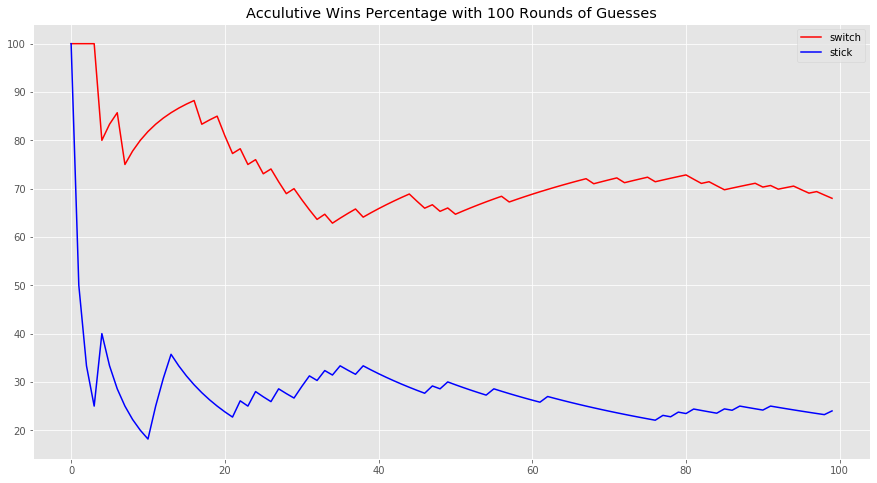

In [8]:
plt.plot(perc_switch, color='r', label='switch')
plt.plot(perc_stick, color='b', label='stick')
plt.legend()
plt.plot()
plt.title('Acculutive Wins Percentage with 100 Rounds of Guesses')

another way

In [7]:
def game(switch):
    doors = [1,2,3]
    
    car = random.choice(doors) 
    choice = random.choice(doors)
    remove_door = random.choice([i for i in doors if i not in [car,choice]]) 
    
    if switch:
        choice = [i for i in doors if i not in [choice,remove_door]][0]
                
    if choice == car:
        return True
    else:
        return False

In [8]:
wins = [0, 0]  # stwitch_win, orginal_win
n = 100
for x in range(0, n):
    if game(True):
        wins[0] += 1
    if game(False):
        wins[1] += 1

print (wins[0])
print (wins[1])

62
35


## Simulate 100 times with 100 rounds of guesses

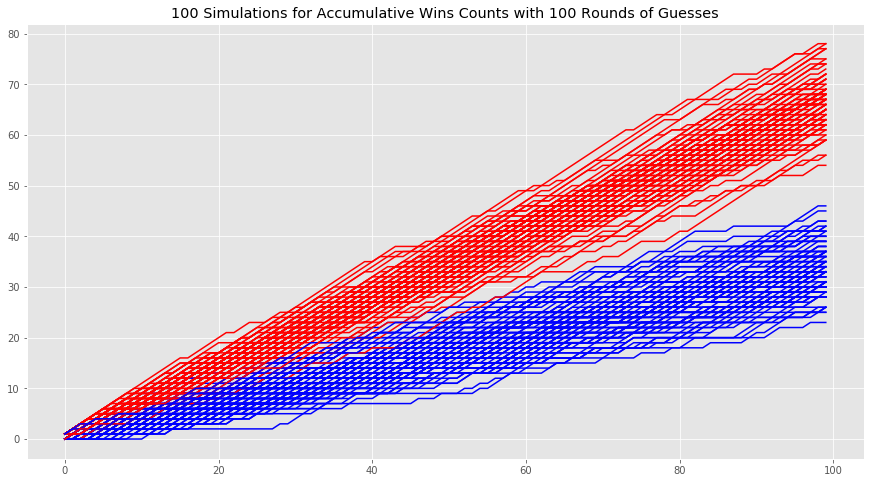

In [16]:
switch = []
stick = []
for i in range(100):
    switch.append(main(N, True)[0])
    stick.append(main(N, False)[0])
    plt.plot(switch[i], color='red', label = 'switch')
    plt.plot(stick[i], color='blue', label = 'stick')
plt.title('100 Simulations for Accumulative Wins Counts with 100 Rounds of Guesses')
plt.show()

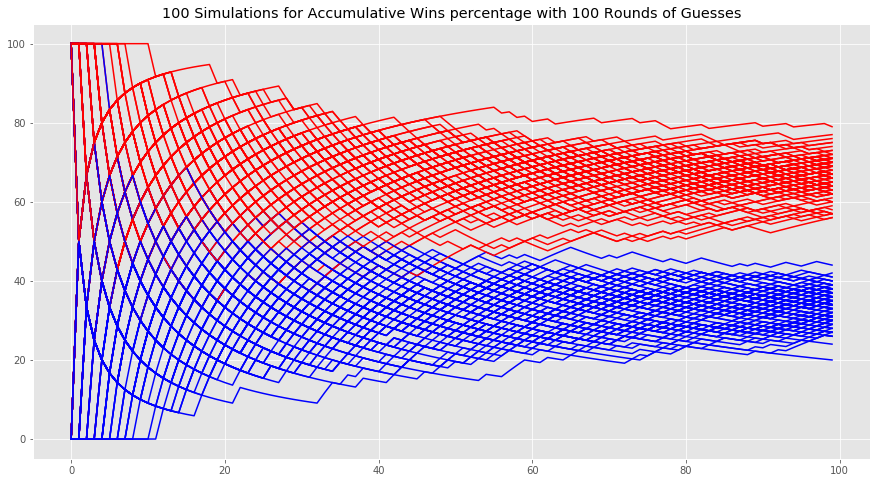

In [17]:
switch_perc = []
stick_perc = []
for i in range(100):
    switch_perc.append(main(N, True)[2])
    stick_perc.append(main(N, False)[2])
    plt.plot(switch_perc[i], color='red', label = 'switch')
    plt.plot(stick_perc[i], color='blue', label = 'stick')
plt.title('100 Simulations for Accumulative Wins percentage with 100 Rounds of Guesses')
plt.show()

With 100 times of simulation, we can see that the percentage of winning for switching door converges to around 67%, and percentage of winning for sticking to original choice converges to around 33%.

### Binomial Simulation of Stick & Switch 

In [41]:
stick = np.random.binomial(100, 0.33, 100) 
switch = np.random.binomial(100, 0.67, 100)  # trail n = 100, p = 0.67, test time size = 100

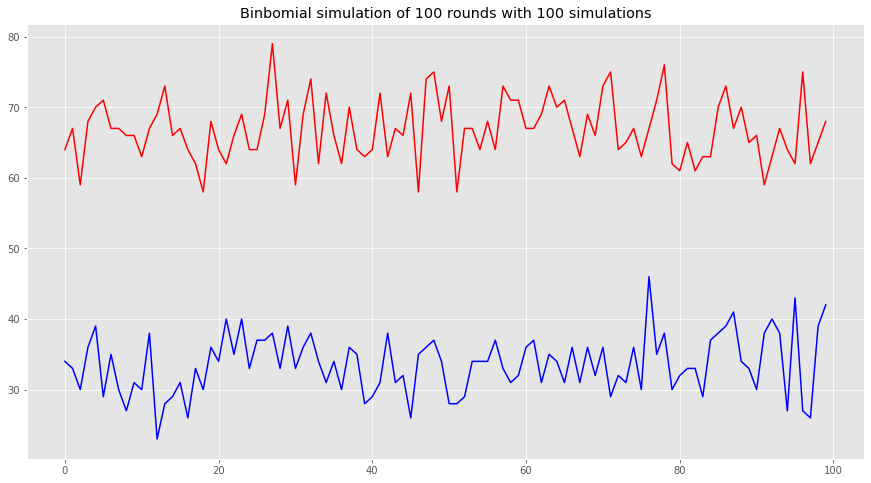

In [42]:
plt.plot(switch, color='red', label = 'switch')
plt.plot(stick, color='blue', label = 'stick')
plt.title('Binbomial simulation of 100 rounds with 100 simulations')
plt.show()

In [43]:
stick_cum = []
switch_cum = []

for j in range(100):
    stick = []
    switch = []
    for i in range(100):
        s = np.random.binomial(1, 0.33, i)
        s_sum = s.sum()
        o = np.random.binomial(1, 0.67, i)
        o_sum = o.sum()
        stick.append(s_sum)
        switch.append(o_sum)

    stick_cum.append(stick)
    switch_cum.append(switch)

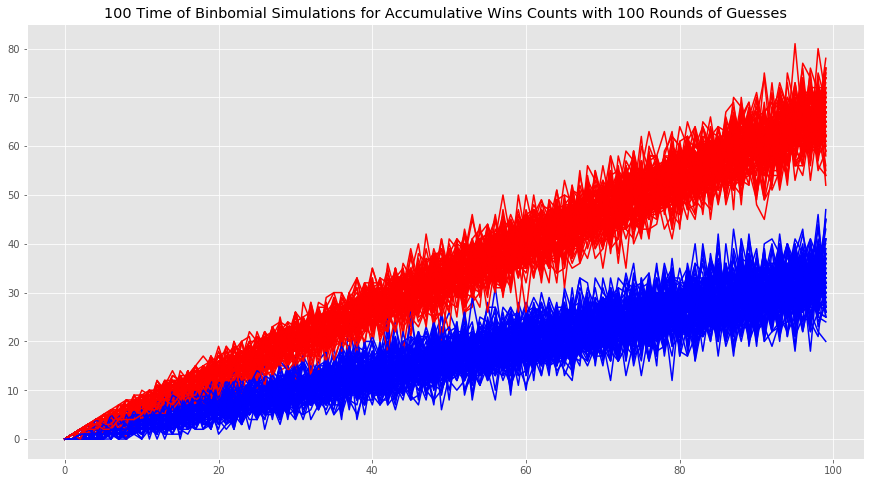

In [45]:
for i in range(100):
    plt.plot(switch_cum[i], color='red', label = 'switch')
    plt.plot(stick_cum[i], color='blue', label = 'stick')
plt.title('100 Time of Binbomial Simulations for Accumulative Wins Counts with 100 Rounds of Guesses')
plt.show()

Test of random.randomint(1,2,3)

In [55]:
test = []
for i in range(10000):
    test.append(random.randint(1,3))

In [56]:
a, b, c = 0, 0, 0
for i in test:
    if i == 1:
        a += 1
    if i == 2:
        b += 1
    if i == 3:
        c += 1

In [57]:
prob_a = a/10000
prob_b = b/10000
prob_c = c/10000

In [58]:
prob_a, prob_b, prob_c

(0.3338, 0.3319, 0.3343)

## Q2

Build the Profit & Loss simulator for the TV show.  What is the cumulative weekly P&L expected over the two years under the following scenarios:

(i) Assume contestants always know the winning strategy;  
(ii) Assuming the old statistics hold and 13% of contestants actually switch doors;  
(iii) Should you proceed with running the show?  Explain why or why not?

Provide Average Weekly Financial Statements and show your answer in graphical form.

In [101]:
# one trail, 100 rounds
weekly_cost = []
for i in range(100):
    door = [1,2,3]
    car = random.choice(door)
    choice = random.choice(door)
    remove_door = random.choice([i for i in door if i not in [car,choice]])
    switch = [i for i in door if i not in [remove_door,choice]]
    score = (switch[0]==car)*1
    total = score*50+110
    weekly_cost.append(total)

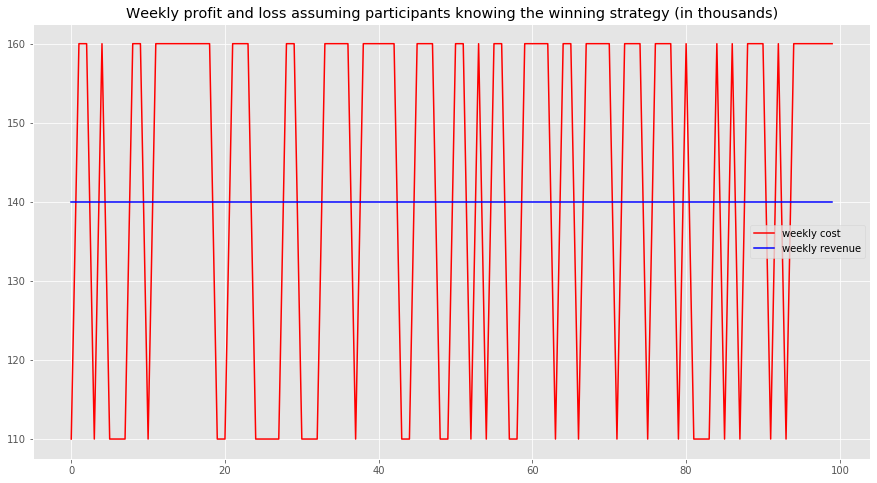

In [102]:
plt.plot(weekly_cost,color='red', label = 'weekly cost')
plt.plot([140 for i in range(100)],color='blue', label = 'weekly revenue')
plt.title('Weekly profit and loss assuming participants knowing the winning strategy (in thousands)')
plt.legend()
plt.show()

Binomial Simulation

In [70]:
# trial n = 1 (1,0), tested 100 times. 
stick = np.random.binomial(1, 0.33333, 100)* 50 + 110
switch = np.random.binomial(1, 0.66666, 100)* 50 + 110

stick_pl = 140 - (np.random.binomial(1, 0.33333, 100)* 50 + 110) 
switch_pl = 140 - (np.random.binomial(1, 0.66666, 100)* 50 + 110) 

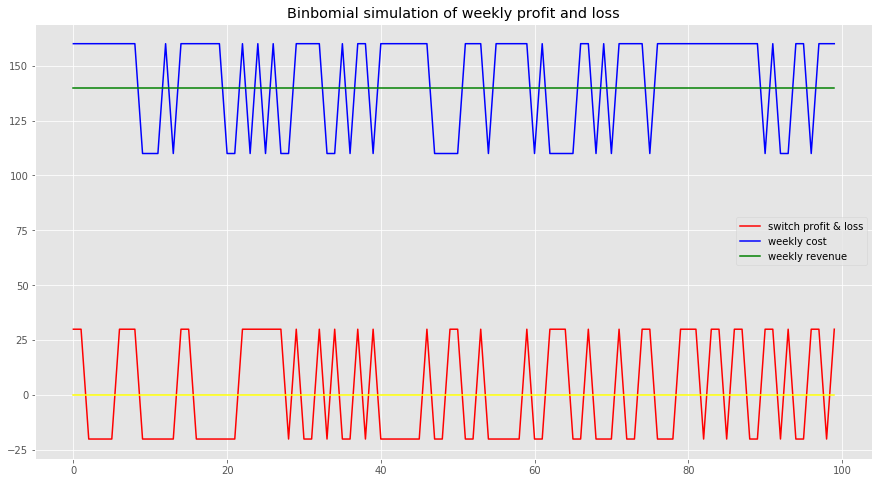

In [71]:
plt.plot(switch_pl, color='red', label = 'switch profit & loss')
plt.plot(switch, color = 'blue', label = 'weekly cost')
plt.plot([140 for i in range(100)], color='green', label = 'weekly revenue')
plt.plot([0 for i in range(100)], color = 'yellow')
plt.title('Binbomial simulation of weekly profit and loss')
plt.legend()
plt.show()

In [ ]:
# trial n = 1 (1,0), tested 100 times. 
stick = np.random.binomial(1, 0.33333, 100)* 50 + 110
switch = np.random.binomial(1, 0.66666, 100)* 50 + 110

stick_pl = 140 - (np.random.binomial(1, 0.33333, 100)* 50 + 110) 
switch_pl = 140 - (np.random.binomial(1, 0.66666, 100)* 50 + 110) 

## Combination

In [76]:
# one trail, 100 rounds
weekly_cost = []
for i in range(100):
    for i in range(100):
        p = np.random.binomial(1, 0.87)
        door = [1,2,3] 
        car = random.choice(door)
        choice = random.choice(door)
        remove_door = random.choice([i for i in door if i not in [car,choice]])
        if p == 1: # switch
            switch = [i for i in door if i not in [remove_door,choice]]
            score = (switch[0]==car)*1 
            total = score*50+110
        else:  # not switch
            score = (choice==car)*1 
            total = score*50+110
    weekly_cost.append(total)

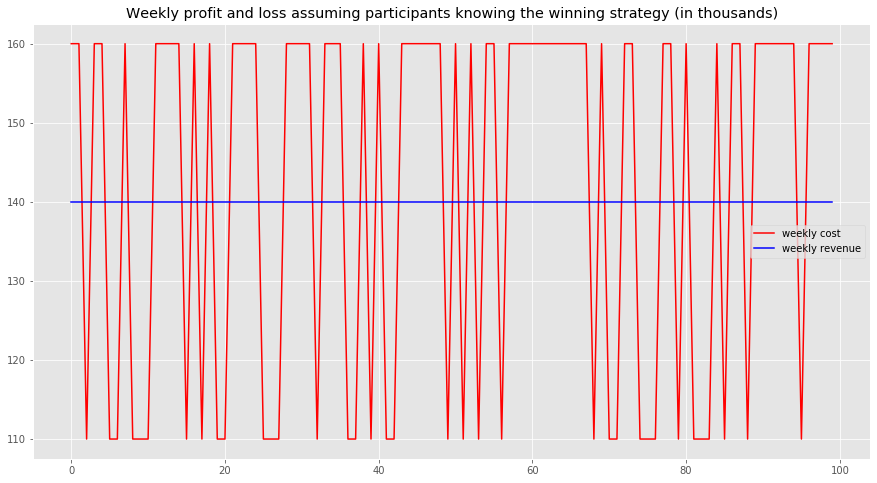

In [77]:
plt.plot(list(range(100)), weekly_cost,color='red', label = 'weekly cost')
plt.plot(list(range(100)),[140 for i in range(100)],color='blue', label = 'weekly revenue')
plt.title('Weekly profit and loss assuming participants knowing the winning strategy (in thousands)')
plt.legend()
plt.show()

In [18]:
# simultion of 1000 time for 100 trials (probability)
stick = (np.random.binomial(100, 0.333, 1000)/1000)* 50000 + 110000
switch = (np.random.binomial(100, 0.677, 1000)/1000)* 50000 + 110000
stick_pl = 140000 - ((np.random.binomial(100, 0.333, 1000)/1000) * 50000 + 110000) 
switch_pl = 140000 - ((np.random.binomial(100, 0.677, 1000)/1000)* 50000 + 110000) 

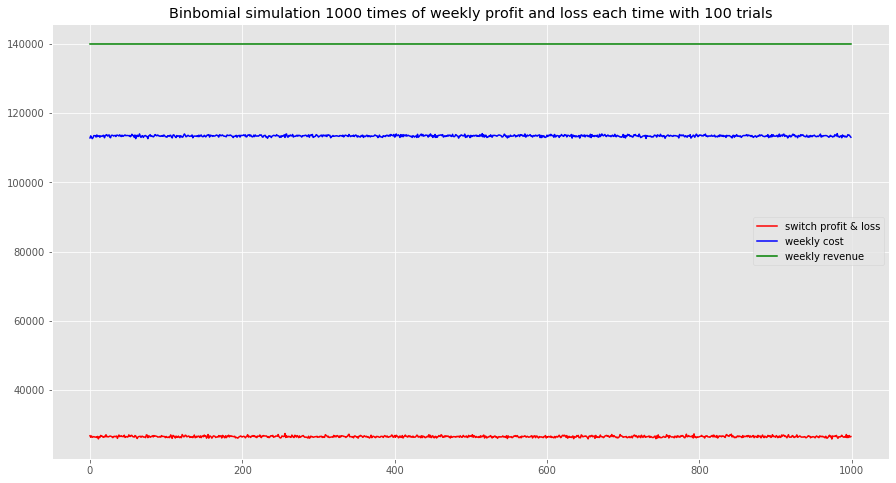

In [19]:
plt.plot(switch_pl, color='red', label = 'switch profit & loss')
plt.plot(switch, color = 'blue', label = 'weekly cost')
plt.plot([140000 for i in range(1000)], color='green', label = 'weekly revenue')
plt.title('Binbomial simulation 1000 times of weekly profit and loss each time with 100 trials')
plt.legend()
plt.show()

(array([ 1.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  5.,
         0.,  0.,  8.,  0.,  0., 21.,  0.,  0., 20.,  0.,  0.,  0., 48.,
         0.,  0., 52.,  0.,  0., 68.,  0.,  0., 69.,  0.,  0., 75.,  0.,
         0., 91.,  0.,  0., 93.,  0.,  0., 82.,  0.,  0.,  0., 72.,  0.,
         0., 60.,  0.,  0., 63.,  0.,  0., 40.,  0.,  0., 39.,  0.,  0.,
        28.,  0.,  0., 14.,  0.,  0., 17.,  0.,  0.,  0.,  7.,  0.,  0.,
         9.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([25900., 25916., 25932., 25948., 25964., 25980., 25996., 26012.,
        26028., 26044., 26060., 26076., 26092., 26108., 26124., 26140.,
        26156., 26172., 26188., 26204., 26220., 26236., 26252., 26268.,
        26284., 26300., 26316., 26332., 26348., 26364., 26380., 26396.,
        26412., 26428., 26444., 26460., 26476., 26492., 26508., 26524.,
        26540., 26556., 26572., 26588., 26604., 26620., 26636., 26652.,
  

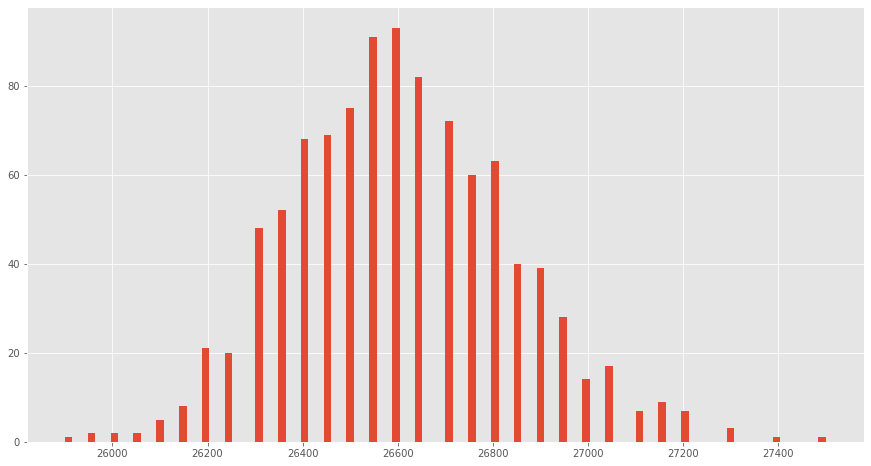

In [20]:
plt.hist(switch_pl, bins=100)

Another way 

In [196]:
p = 0.87
q = 0.13
total_cost = []
for j in range(100):
    total = 0
    for i in range(100):
        a = np.random.random()
        #print(a)
        if a < p:
            s = np.random.binomial(1, 0.33, 1)
            m = s.sum()*5+11
            #print(m)
        else:
            s = np.random.binomial(1, 0.67, 1)
            m = s.sum()*5+11
            #print(m)
        total += m
    total_cost.append(total)


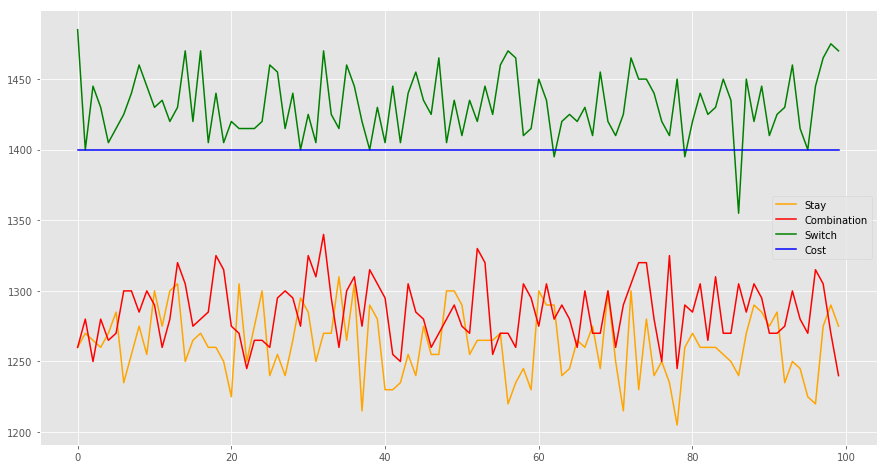

In [205]:
plt.plot(num1,cum_list,color='orange',label='Stay')
plt.plot(num1,total_cost,color='red',label='Combination')
plt.plot(num1,total_list,color='green',label='Switch')
plt.plot(num1,y,color='blue',label='Cost')
plt.legend()
plt.show()

#### Q3

You might recall that the Producer has made the investment in the TV studio and the goats.  If you decide the risk is too high to proceed in the age of the internet, what suggestions would you make to improve the probability of a positive p&l?

Explain why and show a simulation.

Today, contestants are familiar with the winning stragety. The risk of lossing money is very high. In order to make more profit, we have to change the game. In order to increase the probability of a positive p&l, we can <br>

1) add one more door. So the probability of winning if switch become 3/8, probabioity of winning if staying become 1/4.  
2) replace the goats with stuff toys to decrease the initial investment to 500,000
3) Increase the add revenue to 45,000 per 30 seconds. Total adds revenue per week would be 630,000. 

In [117]:
def game(switch):
    doors = [1,2,3,4]
    
    car = random.choice(doors) 
    choice = random.choice(doors)
    remove_door = random.choice([i for i in doors if i not in [car,choice]]) 
    
    if switch:
        choices = [i for i in doors if i not in [choice,remove_door]]
        choice = random.choice(choices)
                
    if choice == car:
        return True
    else:
        return False

In [29]:
stick = []
switch = []
for i in range(1000):  # test 1000 times for a 100 trial
    wins = [0, 0]  # stwitch_win, orginal_win
    n = 100
    for x in range(0, n):
        if game(True):
            wins[0] += 1
        if game(False):
            wins[1] += 1           

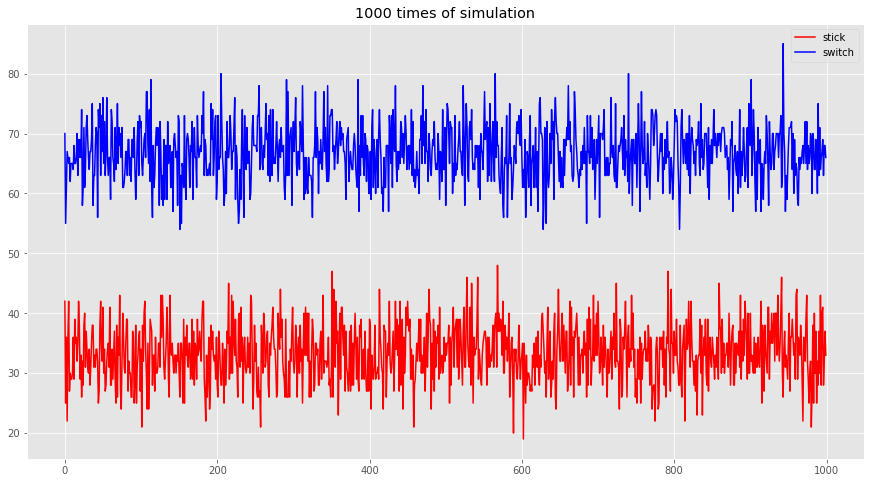

In [23]:
plt.plot(stick, color='red', label = 'stick')
plt.plot(switch, color = 'blue', label = 'switch')
plt.title('1000 times of simulation')
plt.legend()
plt.show()

In [41]:
stick = np.random.binomial(100, 0.25, 100) 
switch = np.random.binomial(100, 0.375, 100)  # trail n = 100, p = 0.375, test time size = 100

In [48]:
# trial n = 1 (1,0), tested 100 times. 
stick = np.random.binomial(1, 0.25, 100)* 50000 + 105000
switch = np.random.binomial(1, 0.375, 100)* 50000 + 105000
stick_pl = 700000 - (np.random.binomial(1, 0.25, 100)* 50000 + 105000) 
switch_pl = 700000 - (np.random.binomial(1, 0.375, 100)* 50000 + 105000) 

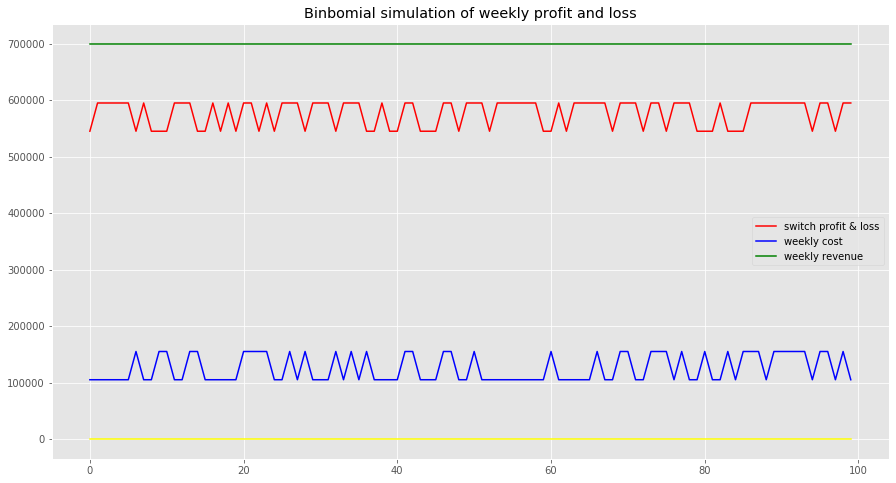

In [49]:
plt.plot(switch_pl, color='red', label = 'switch profit & loss')
plt.plot(switch, color = 'blue', label = 'weekly cost')
plt.plot([700000 for i in range(100)], color='green', label = 'weekly revenue')
plt.plot([0 for i in range(100)], color = 'yellow')
plt.title('Binbomial simulation of weekly profit and loss')
plt.legend()
plt.show()

In [46]:
# simultion of 1000 time for 100 trials (probability)
stick = (np.random.binomial(100, 0.25, 1000)/1000)* 50000 + 105000
switch = (np.random.binomial(100, 0.375, 1000)/1000)* 50000 + 105000
stick_pl = 700000 - ((np.random.binomial(100, 0.25, 1000)/1000) * 50000 + 105000) 
switch_pl = 700000 - ((np.random.binomial(100, 0.375, 1000)/1000)* 50000 + 105000) 

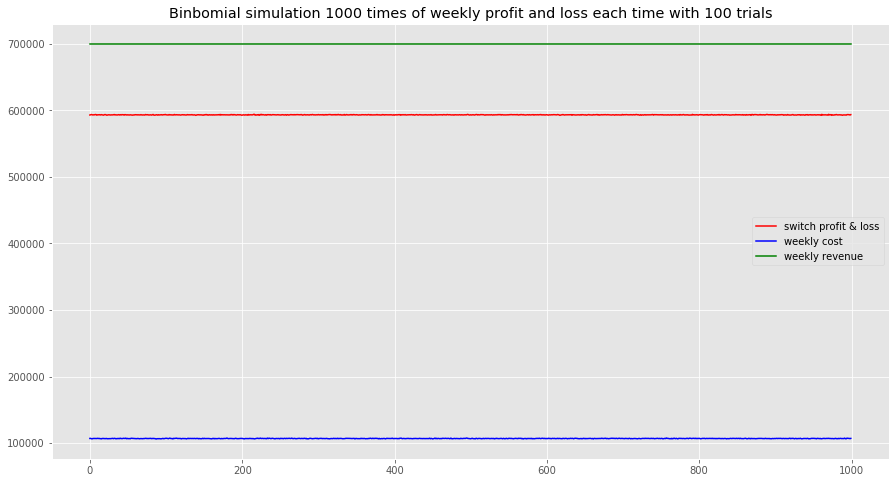

In [47]:
plt.plot(switch_pl, color='red', label = 'switch profit & loss')
plt.plot(switch, color = 'blue', label = 'weekly cost')
plt.plot([700000 for i in range(1000)], color='green', label = 'weekly revenue')
plt.title('Binbomial simulation 1000 times of weekly profit and loss each time with 100 trials')
plt.legend()
plt.show()

In general, increase adds revenue is the most effective way to garantee a positive profit and loss.

Reference: <br>
http://code.jasonbhill.com/python/modeling-the-monty-hall-problem-with-python/